In [1]:
#@title Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title Importação
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/grupo 1/dados/dados/MICRODADOS_CADASTRO_CURSOS_2017.CSV",encoding='latin1',sep=";")

# Quantidade de Matriculadosx Sexo x Região x Área de Atuação

In [ ]:
#@title
question1 = df[['NO_CINE_AREA_GERAL','NO_REGIAO','QT_MAT_FEM','QT_MAT_MASC']]
question1 = question1.groupby(['NO_CINE_AREA_GERAL','NO_REGIAO']).agg('sum')
question1['DIFF_FEM_MASC'] = (question1['QT_MAT_FEM']/(question1['QT_MAT_FEM'] + question1['QT_MAT_MASC'])) - 0.5 
question1 = question1.reset_index()
question1.head()

,NO_CINE_AREA_GERAL,NO_REGIAO,QT_MAT_FEM,QT_MAT_MASC,DIFF_FEM_MASC
0,"Agricultura, silvicultura, pesca e veterinária",Centro-Oeste,16540.0,22787.0,-0.079424
1,"Agricultura, silvicultura, pesca e veterinária",Nordeste,18735.0,18426.0,0.004158
2,"Agricultura, silvicultura, pesca e veterinária",Norte,11140.0,10814.0,0.007425
3,"Agricultura, silvicultura, pesca e veterinária",Sudeste,47680.0,41433.0,0.035051
4,"Agricultura, silvicultura, pesca e veterinária",Sul,25744.0,30641.0,-0.043425


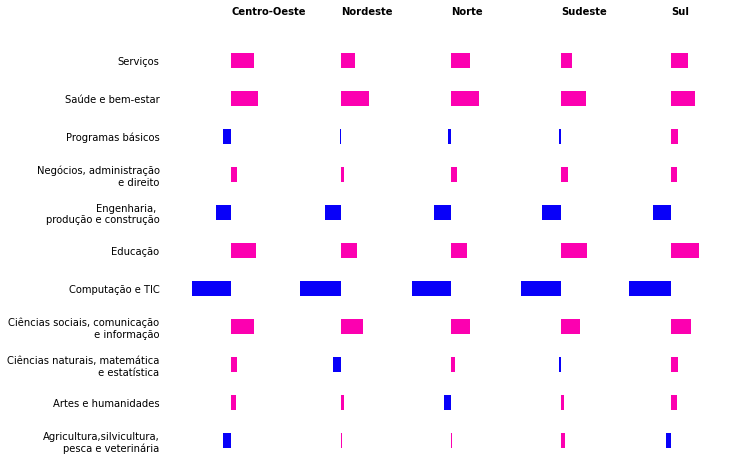

In [ ]:
#@title
LEFT=0
X_POS=0
fig, ax = plt.subplots(figsize=(10, 8))
for local in question1['NO_REGIAO'].unique():
  ax.text(X_POS, 11.2, local, weight='bold')
  localDf = question1.loc[question1['NO_REGIAO'] == local]
  
  #Mapa de cores
  maisMulheres = localDf['DIFF_FEM_MASC'] >= 0
  color_map = maisMulheres.map({True:'#fc00b0',
                                      False:'#0800f9'}
                                    )
  
  ax.barh(localDf['NO_CINE_AREA_GERAL'],
          localDf['DIFF_FEM_MASC'],
          color=color_map,
          left=LEFT,
          height=0.4,
          # width=0.2
          )
  # print(localDf['NO_CINE_AREA_GERAL'].values)
  LEFT+=1
  X_POS+=1

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.grid(axis='y')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([
  'Agricultura,silvicultura,\npesca e veterinária',
  'Artes e humanidades',
  'Ciências naturais, matemática\n e estatística',
  'Ciências sociais, comunicação\n e informação',
  'Computação e TIC',
  'Educação', 'Engenharia, \nprodução e construção',
  'Negócios, administração\n e direito',
  'Programas básicos',
  'Saúde e bem-estar',
  'Serviços'])
ax.tick_params(bottom = False,left=False)
plt.show()


Nesse gráfico a região quanto menor o tamanho da barra mais bem distrubuído em relação a Masculino e Feminino é a turma. Além disso a barras barras são alinhadas no centro, então se uma barra vai para direito significa que há maior presença do Sexo feminino nessa área além disso a cor Rosa ajuda a visualizar qual sexo é mais presente.

Para os próximos passos poderia haver um número representando essa diferença entre os sexos, para auxiliar na quantificação. Além disso o eixo Y deveria ser organizado em uma forma lógica de áreas próximas para auxiliar na comparação entre áreas.

# Quantidade de Trancamentos x Área x Região x IDH

In [ ]:
#@title
atlas = pd.read_excel("/content/drive/MyDrive/grupo 1/dados/tabelaIDHM.xlsx")
atlas = atlas.groupby(['Regiao']).agg('mean')
atlas = atlas.reset_index()
atlas

,Regiao,IDHM 2017
0,Centro-Oeste,0.789750
1,Nordeste,0.718667
2,Norte,0.733429
3,Sudeste,0.795250
4,Sul,0.764333
5,Total,0.778000


In [ ]:
#@title
#Trancamento x Curso x Tipo de Rede de Ensino x Turno
question2 = df[['NO_CINE_AREA_GERAL','NO_REGIAO','QT_SIT_TRANCADA','QT_MAT']]
question2 = question2.merge(atlas, left_on='NO_REGIAO', right_on='Regiao')
question2 =question2.groupby(['NO_CINE_AREA_GERAL','NO_REGIAO','IDHM 2017']).agg('sum')
question2 = question2.reset_index(level='IDHM 2017')
question2['Proporcao'] = question2['QT_SIT_TRANCADA']/question2['QT_MAT']
question2 = question2.reset_index()
question2.head(3)

,NO_CINE_AREA_GERAL,NO_REGIAO,IDHM 2017,QT_SIT_TRANCADA,QT_MAT,Proporcao
0,"Agricultura, silvicultura, pesca e veterinária",Centro-Oeste,0.789750,5556.0,39327.0,0.141277
1,"Agricultura, silvicultura, pesca e veterinária",Nordeste,0.718667,3278.0,37161.0,0.088211
2,"Agricultura, silvicultura, pesca e veterinária",Norte,0.733429,2498.0,21954.0,0.113783


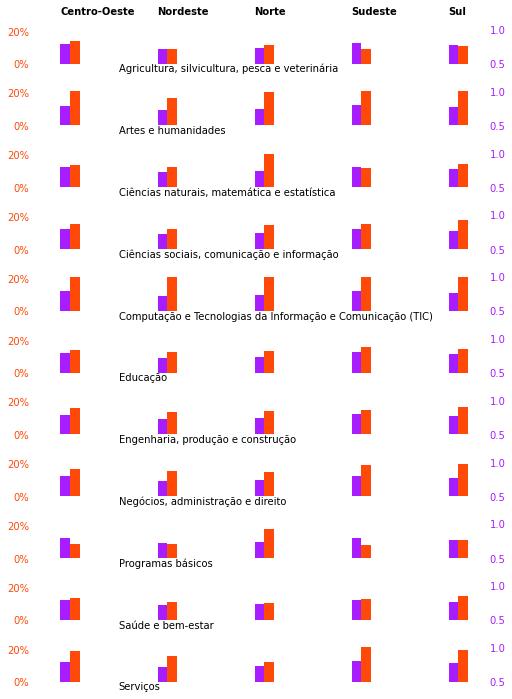

In [ ]:
#@title
NUM_GRAFICOS = len(question2['NO_CINE_AREA_GERAL'].unique())
fig, ax = plt.subplots(NUM_GRAFICOS, 1,figsize=(8, 12))
for NUM_AX in range(0,NUM_GRAFICOS):
  NOME_AREA = question2['NO_CINE_AREA_GERAL'].unique()[NUM_AX]
  localDf = question2.loc[question2['NO_CINE_AREA_GERAL'] ==  NOME_AREA]
  ax2 = ax[NUM_AX].twinx() # Create another axes that shares the same x-axis as ax.

  width = 0.1
  localDf['Proporcao'].plot(kind='bar', color='#FF4908', ax=ax[NUM_AX], width=width, position=0)
  localDf['IDHM 2017'].plot(kind='bar', color='#A81DFF', ax=ax2, width=width, position=1)
  ax[NUM_AX].text(0.5, -0.05, NOME_AREA)
  ax[NUM_AX].set_ylim(0, 0.21)
  ax2.set_ylim(0.5, 1)
  vals = ax[NUM_AX].get_yticks()
  ax[NUM_AX].set_yticklabels(['{:,.0%}'.format(x) for x in vals],color='#FF4908')
  ax2.tick_params(axis='y', colors='#A81DFF')
  ax[NUM_AX].xaxis.set_ticklabels([])
  ax2.tick_params(right=False)
  ax[NUM_AX].tick_params(bottom = False,left=False)
  for lado in ['top','right','bottom','left']:
    ax[NUM_AX].spines[lado].set_visible(False)
    ax2.spines[lado].set_visible(False)
plt.subplots_adjust(
    # left=0.1,
    #                 bottom=0.1, 
    #                 right=0.9, 
    #                 top=0.9, 
    #                 wspace=0.4, 
                    hspace=0.8)
DISTANCIA = -0.1
for REGIAO in  question2['NO_REGIAO'].unique():
  ax[0].text(DISTANCIA,0.3, REGIAO, weight='bold')
  DISTANCIA+=1
plt.show()


Em laranja temos a porcentagem de trancamentos em relação a quantidade de matrículas totais, em roxo temos o IDH da região, esse tipo de visualização poderia ter melhoras na variável IDH visto que ela se repete diversas vezes. E pelo formato dessa visualização ela aparenta ser mais adequada para telas de smartphones.

# Quantidade de Trancamentos X Tipo de Rede X Turno X Área




In [ ]:
#@title
atlasSexo = pd.read_excel("/content/drive/MyDrive/grupo 1/dados/populacaoHM.xlsx")
atlasSexo = atlasSexo.groupby(['Regiao']).agg('sum')
atlasSexo.columns = ['Masc','Fem']
atlasSexo = atlasSexo.reset_index()
atlasSexo['propFem'] = atlasSexo['Fem']/(atlasSexo['Fem']+atlasSexo['Masc'])
atlasSexo

,Regiao,Masc,Fem,propFem
0,Centro-Oeste,6979971.0,7078123.0,0.503491
1,Nordeste,29215661.0,30544287.0,0.511116
2,Norte,6007457.0,6042474.0,0.501453
3,Sudeste,39076647.0,41287763.0,0.513757
4,Sul,12127254.0,12396162.0,0.505483
5,Total,93406990.0,97348809.0,0.510332


Idade, Raça, Concluinte por categoria, PCD

In [ ]:
#@title
question3 = df[['QT_SIT_TRANCADA','NO_CINE_AREA_GERAL','TP_REDE','QT_MAT_DIURNO','QT_MAT_NOTURNO','QT_MAT']]
question3 =question3.groupby(['NO_CINE_AREA_GERAL','TP_REDE']).agg('sum')
question3['noturno'] = question3['QT_MAT_NOTURNO']/(question3['QT_MAT_NOTURNO']+question3['QT_MAT_DIURNO'])
question3 = question3.reset_index()
question3['trancados'] = question3['QT_SIT_TRANCADA']/(question3['QT_SIT_TRANCADA']+question3['QT_MAT'])
question3.head(3)

,NO_CINE_AREA_GERAL,TP_REDE,QT_SIT_TRANCADA,QT_MAT_DIURNO,QT_MAT_NOTURNO,QT_MAT,noturno,trancados
0,"Agricultura, silvicultura, pesca e veterinária",1,9516.0,117929.0,5536.0,123613.0,0.044839,0.071480
1,"Agricultura, silvicultura, pesca e veterinária",2,15971.0,68763.0,48007.0,120336.0,0.411124,0.117169
2,Artes e humanidades,1,6638.0,42286.0,20993.0,63669.0,0.331753,0.094414


2 gráficos por tipo de rede. Área, qnt matriculados, qnt tracados, porcentagem escrita

Organizar por região

In [ ]:
#@title
# df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(question3, path=['TP_REDE', 'NO_CINE_AREA_GERAL'], values='QT_SIT_TRANCADA',
                  color='noturno', #hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  # color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop'])
                  )
fig.show()

Dividir gráfico em sunburst com matrículas diurnas e nortunas e combinar com um gráfico de barras com a quantidade de trancamentos.

In [ ]:
#@title
labelsList = [*[1,2],*question3['NO_CINE_AREA_GERAL']]
parentsList = [*["",""],*question3['TP_REDE']]
total = question3.loc[question3['TP_REDE']==2]['trancados'].sum()*1.3
valuesList = [*[total,total], *question3['trancados']]
fig =go.Figure()
fig.add_trace(go.Sunburst(
    labels=labelsList,
    parents=parentsList,
    values=valuesList,
    branchvalues="total",
    domain=dict(column=0)
))
fig.add_trace(go.Sunburst(
    labels=labelsList,
    parents=parentsList,
    values=valuesList,
    branchvalues="total",
    domain=dict(column=1)
))
fig.update_layout(
                  grid=dict(columns=2,rows=1))

fig.show()

In [ ]:
#@title
question3 = df[['QT_SIT_TRANCADA','NO_CINE_AREA_GERAL','TP_REDE','NO_REGIAO','QT_MAT']]
question3 =question3.groupby(['NO_CINE_AREA_GERAL','TP_REDE','NO_REGIAO']).agg('sum')
question3 = question3.reset_index()
q31= question3.loc[question3["TP_REDE"]==1] 
q32= question3.loc[question3["TP_REDE"]==2]


fig = make_subplots(rows=2, cols=6,
                    horizontal_spacing=0.05,
                    subplot_titles=tuple(["Brasil",*question3['NO_REGIAO'].unique()]),
                    specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'},{'type':'domain'},{'type':'domain'}, {'type':'domain'},{'type':'domain'}, {'type':'domain'}]])
ROW_NUM=1

q31= question3.loc[question3["TP_REDE"]==1] 
q32= question3.loc[question3["TP_REDE"]==2]
fig.add_trace(go.Pie(labels=q31['NO_CINE_AREA_GERAL'], values=q31['QT_SIT_TRANCADA'], name="Pública"), 
              1, ROW_NUM)
fig.add_trace(go.Pie(labels=q32['NO_CINE_AREA_GERAL'], values=q32['QT_SIT_TRANCADA'], name="Privada"),
              2, ROW_NUM)
for REGIAO in question3['NO_REGIAO'].unique():
  pos=0
  ROW_NUM+=1
  dfRegiao = question3.loc[question3['NO_REGIAO'] == REGIAO]
  q31= dfRegiao.loc[dfRegiao["TP_REDE"]==1] 
  q32= dfRegiao.loc[dfRegiao["TP_REDE"]==2]
  fig.add_trace(go.Pie(labels=q31['NO_CINE_AREA_GERAL'], values=q31['QT_SIT_TRANCADA'], name="Pública"), 
              1, ROW_NUM)
  fig.add_trace(go.Pie(labels=q32['NO_CINE_AREA_GERAL'], values=q32['QT_SIT_TRANCADA'], name="Privada"),
                2,ROW_NUM)


fig.update_traces(hoverinfo='label+percent+name+value', textinfo='none')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
)



fig.show()


Coloca Descrições a parte

Utilizar o gráfico acima para todas as reigões e o raio da pizza ser a quantidade total de trancamentos

# Quantidade de Matriculados x Raça/Cor x Região X Trancamentos

Similar ao primeiro gráfico, porém, usando gráficos de setores no lugar das barras (já que estamos lidandos com Raça/Cor e não mais com Sexo). Talvez teremos que analisar somente no nordeste para não poluir com muitos gráficos de setores.

In [22]:
mat = df[['QT_MAT','NO_REGIAO','QT_MAT_BRANCA',
                'QT_MAT_PRETA','QT_MAT_PARDA','QT_MAT_AMARELA','QT_MAT_INDIGENA',
                'QT_MAT_CORND']]
conc = df[['QT_CONC','NO_REGIAO','QT_CONC_BRANCA','QT_CONC_PRETA','QT_CONC_PARDA','QT_CONC_AMARELA','QT_CONC_INDIGENA',
'QT_CONC_CORND']]

mat=mat.drop(['NO_REGIAO'], axis=1)
conc=conc.drop(['NO_REGIAO'], axis=1)
# mat = mat.groupby(['NO_REGIAO']).agg('sum')
# conc = conc.groupby(['NO_REGIAO']).agg('sum')
conc = conc.sum().to_frame().T
mat = mat.sum().to_frame().T
for coluna in mat.columns[1:]:
  mat[coluna]=mat[coluna]/mat['QT_MAT']
for coluna in conc.columns[1:]:
  conc[coluna]=conc[coluna]/conc['QT_CONC']
matBR=mat.drop(['QT_MAT'], axis=1).T.reset_index()
concBR=conc.drop(['QT_CONC'], axis=1).T.reset_index()
display(matBR)
display(concBR)

,index,0,NO_REGIAO
0,QT_MAT_BRANCA,0.397385,BRASIL
1,QT_MAT_PRETA,0.064276,BRASIL
2,QT_MAT_PARDA,0.260353,BRASIL
3,QT_MAT_AMARELA,0.016161,BRASIL
4,QT_MAT_INDIGENA,0.006846,BRASIL
5,QT_MAT_CORND,0.254979,BRASIL


,index,0,NO_REGIAO
0,QT_CONC_BRANCA,0.405259,BRASIL
1,QT_CONC_PRETA,0.053572,BRASIL
2,QT_CONC_PARDA,0.226412,BRASIL
3,QT_CONC_AMARELA,0.015978,BRASIL
4,QT_CONC_INDIGENA,0.004124,BRASIL
5,QT_CONC_CORND,0.294654,BRASIL


In [54]:
#@title
from pandas.errors import NumbaUtilError
mat = df[['QT_MAT','NO_REGIAO','QT_MAT_BRANCA',
                'QT_MAT_PRETA','QT_MAT_PARDA','QT_MAT_AMARELA','QT_MAT_INDIGENA',
                'QT_MAT_CORND']]
conc = df[['QT_CONC','NO_REGIAO','QT_CONC_BRANCA','QT_CONC_PRETA','QT_CONC_PARDA','QT_CONC_AMARELA','QT_CONC_INDIGENA',
'QT_CONC_CORND']]
categories = ['Branca','Preta','Parda',
              'Amarela', 'Indígena', 'Não definida']

listaRegioes = mat.dropna()['NO_REGIAO'].unique() 
listaRegioes  =np.append('Brasil', listaRegioes)
fig = make_subplots(rows=3, cols=2, specs=[[{'type': 'polar'}]*2]*3,subplot_titles=(listaRegioes),vertical_spacing=0.09,horizontal_spacing=0)

NUMBER= 0
aux = True


for REGIAO in listaRegioes:
  rowNum = 1+(NUMBER//2)
  colNum = 1+(NUMBER%2)
  if REGIAO == 'Brasil':
    tempMat = matBR
    tempConc = concBR
  else:
    tempMat = mat.loc[mat['NO_REGIAO'] == REGIAO]
    tempConc = conc.loc[conc['NO_REGIAO'] == REGIAO]
    tempMat=tempMat.drop(['NO_REGIAO'], axis=1)
    tempConc=tempConc.drop(['NO_REGIAO'], axis=1)
    tempConc = tempConc.sum().to_frame().T
    tempMat = tempMat.sum().to_frame().T
    for coluna in tempMat.columns[1:]:
      tempMat[coluna]=tempMat[coluna]/tempMat['QT_MAT']
    for coluna in tempConc.columns[1:]:
      tempConc[coluna]=tempConc[coluna]/tempConc['QT_CONC']
    tempMat=tempMat.drop(['QT_MAT'], axis=1).T.reset_index()
    tempConc=tempConc.drop(['QT_CONC'], axis=1).T.reset_index()

  # tempConc = tempConc.drop("NO_REGIAO",axis=1)
  # tempMat = tempMat.drop("NO_REGIAO",axis=1)
  tempConc['index']=categories
  tempMat['index']=categories

  fig.add_trace(go.Scatterpolar(r=tempMat[0],theta=tempMat['index'],name='Matrículas',subplot = f'polar{NUMBER+1}',line_color = 'blue', showlegend=aux),rowNum, colNum,)
  fig.add_trace(go.Scatterpolar(r=tempConc[0],theta=tempConc['index'],name='Conclusão',subplot = f'polar{NUMBER+1}',line_color = 'red', showlegend=aux),rowNum, colNum,)
  if aux: 
    aux = False
  fig.update_layout(
    font=dict(size=16),
    polar1=dict(radialaxis=dict(visible=True,range=[0, 0.7], tickfont_size = 8),angularaxis=dict( tickfont_size = 12)),
    polar2=dict(radialaxis=dict(visible=True,range=[0, 0.7], tickfont_size = 8),angularaxis=dict( tickfont_size = 12)),
    polar3=dict(radialaxis=dict(visible=True,range=[0, 0.7], tickfont_size = 8),angularaxis=dict( tickfont_size = 12)),
    polar4=dict(radialaxis=dict(visible=True,range=[0, 0.7], tickfont_size = 8),angularaxis=dict( tickfont_size = 12)),
    polar5=dict(radialaxis=dict(visible=True,range=[0, 0.7], tickfont_size = 8),angularaxis=dict( tickfont_size = 12)),
    polar6=dict(radialaxis=dict(visible=True,range=[0, 0.7], tickfont_size = 8),angularaxis=dict( tickfont_size = 12)),
    showlegend=True)
  #angularaxis = dict(
   #     tickfont_size = 8
    #  )
  NUMBER += 1
fig.update_layout(height=800, width=800, paper_bgcolor = "rgb(223, 223, 223)",legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.1,
    xanchor="right",
    x=0.6),
    margin=dict(l=0, r=0, t=0, b=5),
)
fig.show()